In [40]:
library(TSCAN)

## Testing on toy data set provided by TSCAN

In [41]:
data(lpsdata)
# preprocess: zero-trimming, taking log, gene-clustering
procdata = preprocess(lpsdata)

In [42]:
# cell-clustering based on mclust
lpsmclust = exprmclust(procdata)

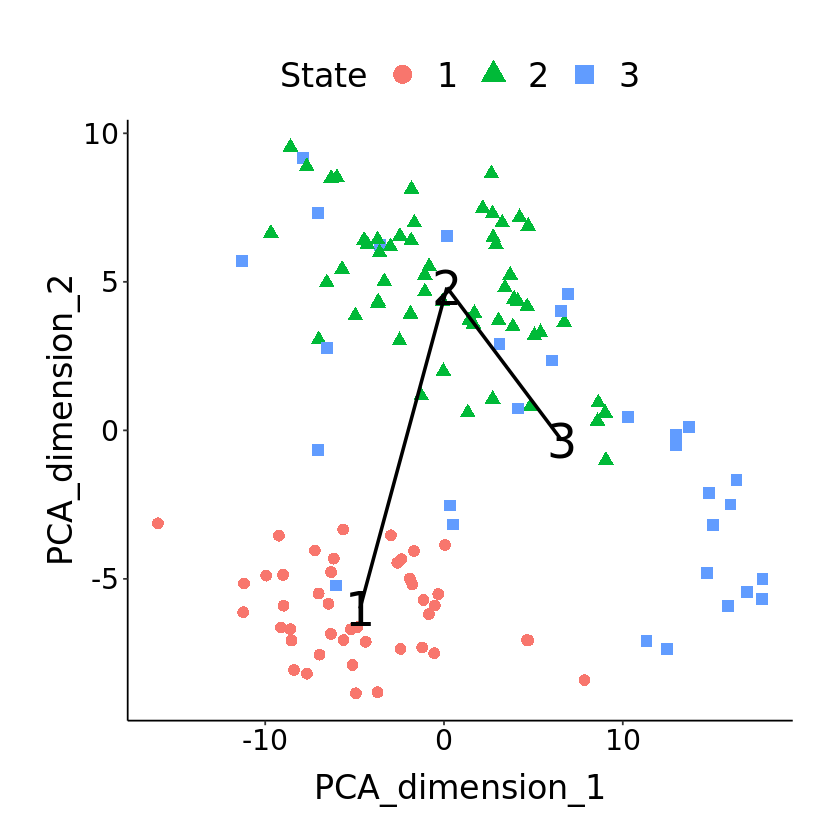

In [43]:
plotmclust(lpsmclust)

In [44]:
# cluster ordering on the minimal spanning tree
lpsorder = TSCANorder(lpsmclust)

In [45]:
# Use difftest function to detect differentially expressed genes given a constructed pseudotemporal ordering.
diffval = difftest(procdata,lpsorder)

In [46]:
# print out a few genes that are significantly changed acrossed the tree nodes (each of which is the mean of 
# cells in the same cluster)
head(row.names(diffval)[diffval$qval < 0.05])

[1] "STX6"     "MRPL28"   "CUTA"     "AI413582" "SNRPC"    "MTCH1"

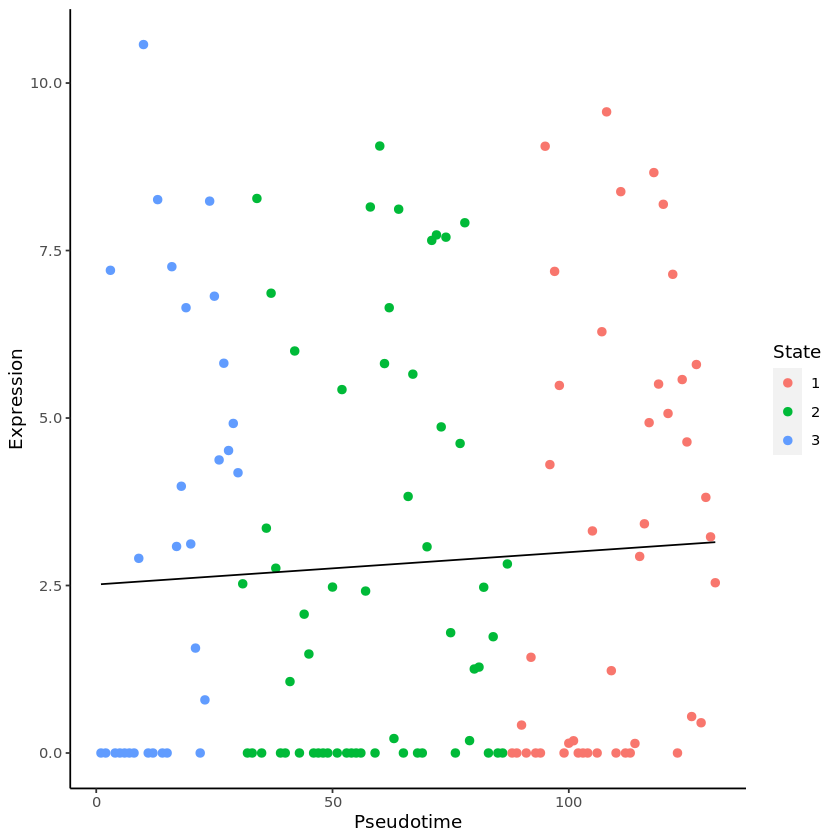

In [47]:
# plot pseudotemporal trajectory of certain gene expression
STAT2expr = log2(lpsdata["STX6",]+1)
singlegeneplot(STAT2expr, TSCANorder(lpsmclust,flip=TRUE,orderonly=FALSE))

In [63]:
class(lpsdata)

[1] "matrix"

## Testing on sample 310

The reason for choosing 310 is that it contains about 800 cells which is neither too few nor too many

In [89]:
count310 = read.csv(file='/scratch/count_matrix_sample310.csv',header=TRUE)

In [90]:
rownames(count310) = count310$X

In [76]:
count310 = count310[-c(1)]

In [77]:
count310 = data.matrix(count310)

In [81]:
preprocessed_count310 = preprocess(count310)

In [82]:
sample310_cluster = exprmclust(preprocessed_count310, clusternum = 2:150)

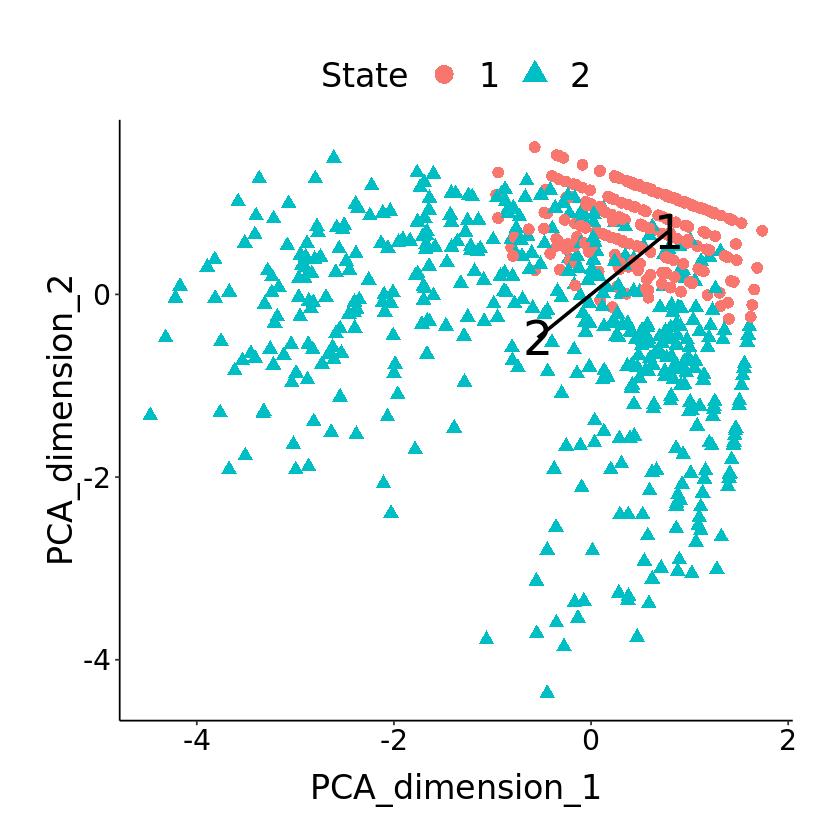

In [83]:
plotmclust(sample310_cluster)

In [84]:
sample310_order = TSCANorder(sample310_cluster)

In [85]:
sample310_diffval = difftest(preprocessed_count310,sample310_order)

In [86]:
head(row.names(sample310_diffval)[sample310_diffval$qval < 0.05])

[1] "LAPTM5" "SOD2"   "MT2A"   "CCL4"

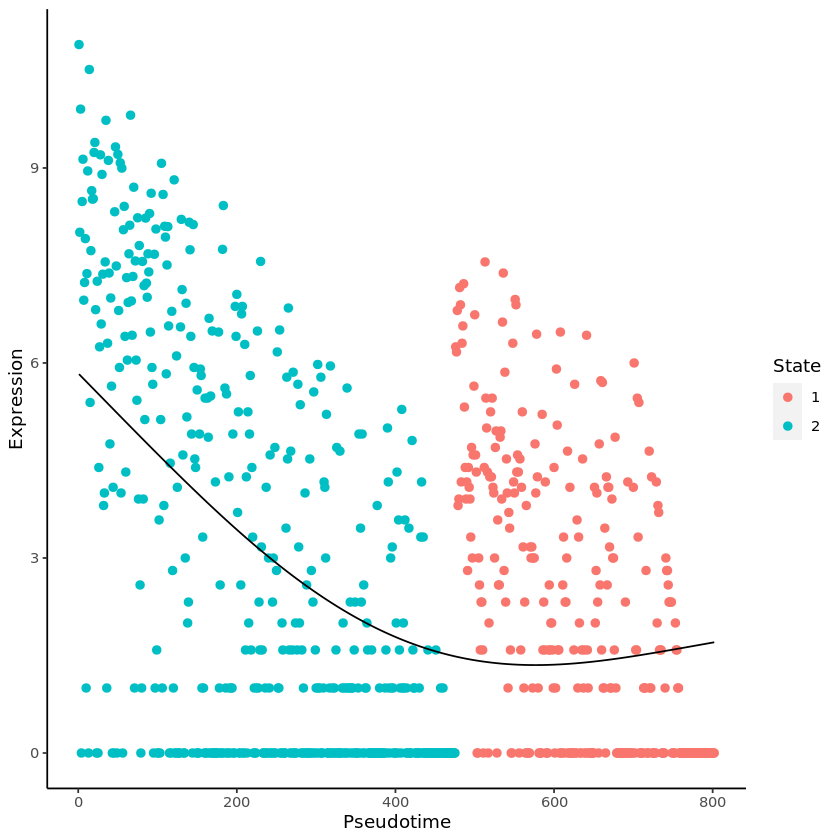

In [88]:
# plot pseudotemporal trajectory of certain gene expression
CCL4expr = log2(count310['CCL4',]+1)
singlegeneplot(CCL4expr, TSCANorder(sample310_cluster,flip=TRUE,orderonly=FALSE))